# Gradient Boosting Machine

In [1]:
# Load the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Load and combine the data
data = pd.read_csv('data/data.csv')

# Drop filename column
data = data.drop('filename', axis=1)

# Perform one-hot encoding on the label
data = pd.get_dummies(data, columns=['label'])

# Split the data into features and labels
X = data.drop(['label_blues', 'label_classical', 'label_country', 'label_disco', 'label_hiphop', 'label_jazz', 'label_metal', 'label_pop', 'label_reggae', 'label_rock'], axis=1)
y = data[['label_blues', 'label_classical', 'label_country', 'label_disco', 'label_hiphop', 'label_jazz', 'label_metal', 'label_pop', 'label_reggae', 'label_rock']]
y = y.idxmax(axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [3]:
# Create the model
model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

# Train the model
model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [4]:
# Make predictions
y_pred = model.predict(X_test)

In [5]:
# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[ 9  0  3  2  1  0  2  0  4  1]
 [ 0 15  0  0  0  4  0  0  1  1]
 [ 4  1 11  0  0  2  0  2  1  3]
 [ 0  0  1  1  3  0  3  5  1  4]
 [ 1  0  1  1  5  1  2  1  4  2]
 [ 1  1  2  1  0  8  0  2  2  1]
 [ 1  0  0  3  4  0 10  0  0  1]
 [ 0  0  2  3  1  1  0 11  0  1]
 [ 0  0  2  2  2  0  0  0 11  0]
 [ 5  0  0  4  1  2  1  0  3  8]]
Classification Report:
                  precision    recall  f1-score   support

    label_blues       0.43      0.41      0.42        22
label_classical       0.88      0.71      0.79        21
  label_country       0.50      0.46      0.48        24
    label_disco       0.06      0.06      0.06        18
   label_hiphop       0.29      0.28      0.29        18
     label_jazz       0.44      0.44      0.44        18
    label_metal       0.56      0.53      0.54        19
      label_pop       0.52      0.58      0.55        19
   label_reggae       0.41      0.65      0.50        17
     label_rock       0.36      0.33      0.35        2

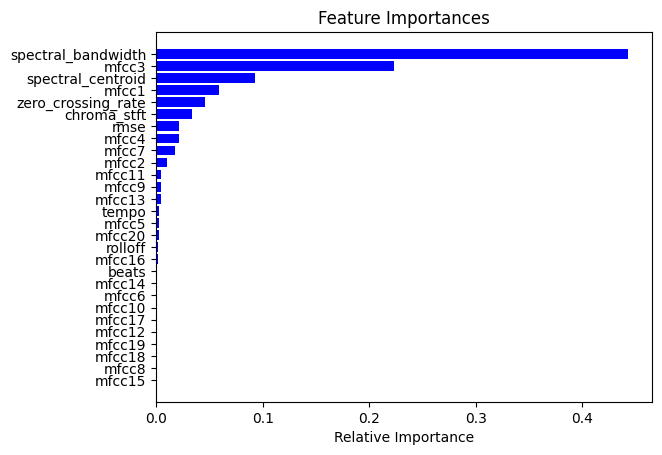

In [6]:
# Plot the feature importances
feature_importances = model.feature_importances_
feature_names = X.columns
indices = np.argsort(feature_importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), feature_importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()